In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,NaN,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,NaN,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,NaN,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,NaN,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	21
float64		column 2	25
float64		column 3	5
float64		column 4	10
float64		column 5	5
float64		column 6	5
float64		column 7	0
float64		column 8	11
float64		column 9	10


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,193.000000,189.000000,209.000000,204.000000,209.000000,209.000000,214.000000,203.000000,204.000000
mean,1.518174,13.410159,2.662584,1.421078,72.650191,0.494545,8.956963,0.162266,0.054951
std,0.002789,0.842306,1.452199,0.473361,0.779258,0.659762,1.423153,0.460776,0.096472
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516520,12.930000,1.880000,1.180000,72.280000,0.120000,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.350000,72.790000,0.550000,8.600000,0.000000,0.000000
75%,1.519050,13.810000,3.600000,1.622500,73.080000,0.610000,9.172500,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.020000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

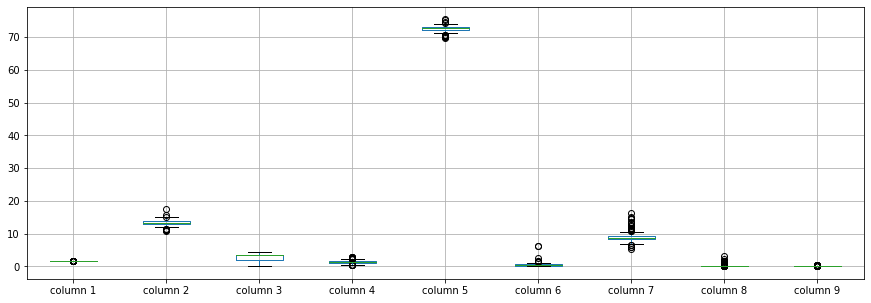

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518174
column 2    13.410159
column 3     2.662584
column 4     1.421078
column 5    72.650191
column 6     0.494545
column 7     8.956963
column 8     0.162266
column 9     0.054951
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.156003,-0.078033,-0.419309,-0.484391,-0.292984,0.791570,-0.160504,0.178059
column 2,-0.156003,1.000000,-0.250718,0.115761,-0.055168,-0.256057,-0.304524,0.300546,-0.229204
column 3,-0.078033,-0.250718,1.000000,-0.487884,-0.154989,0.005759,-0.446430,-0.490595,0.069606
column 4,-0.419309,0.115761,-0.487884,1.000000,0.131854,0.221267,-0.215760,0.462724,-0.049432
column 5,-0.484391,-0.055168,-0.154989,0.131854,1.000000,-0.196852,-0.208586,-0.150043,-0.091016
column 6,-0.292984,-0.256057,0.005759,0.221267,-0.196852,1.000000,-0.317772,-0.077257,-0.009769
column 7,0.791570,-0.304524,-0.446430,-0.215760,-0.208586,-0.317772,1.000000,-0.059148,0.139902
column 8,-0.160504,0.300546,-0.490595,0.462724,-0.150043,-0.077257,-0.059148,1.000000,-0.035812
column 9,0.178059,-0.229204,0.069606,-0.049432,-0.091016,-0.009769,0.139902,-0.035812,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+16,9+16+16,9+16+16+16,9+16+16+16+16,9+16+16+16+16+16,9+16+16+16+16,9+16+16+16,9+16+16,9+16,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 98.85289412278395
Epoch: 1 , loss: 98.78487161489633
Epoch: 2 , loss: 98.87917973445012
Epoch: 3 , loss: 98.77736194317157
Epoch: 4 , loss: 98.62077038104718
Epoch: 5 , loss: 98.81586280235878
Epoch: 6 , loss: 98.70806415264423
Epoch: 7 , loss: 98.75172483004056
Epoch: 8 , loss: 98.64343672532301
Epoch: 9 , loss: 98.6199728158804
Epoch: 10 , loss: 98.64804487961989
Epoch: 11 , loss: 98.60140991210938
Epoch: 12 , loss: 99.02022141676683
Epoch: 13 , loss: 98.95886817345253
Epoch: 14 , loss: 98.56998267540565
Epoch: 15 , loss: 98.66228367732121
Epoch: 16 , loss: 98.64225945105919
Epoch: 17 , loss: 98.59447127122145
Epoch: 18 , loss: 98.77445220947266
Epoch: 19 , loss: 98.53847210223859
Epoch: 20 , loss: 99.03890697772687
Epoch: 21 , loss: 98.58345442551833
Epoch: 22 , loss: 98.62076333852914
Epoch: 23 , loss: 98.66767120361328
Epoch: 24 , loss: 98.72363750751202
Epoch: 25 , loss: 98.65917499248798
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
2,0.0,-13.504561,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,-14.115940,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
210,0.0,0.000000,0.0,-1.961422,0.0,0.0,0.0,0.00000,0.0
211,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,-1.62399,0.0
212,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(176.16909626204054, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.16155840346107123

In [18]:
new_df.iloc[66,:]

column 1     0.025479
column 2    13.050000
column 3     3.650000
column 4     0.870000
column 5    72.220000
column 6     0.190000
column 7     9.850000
column 8     0.000000
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.640000,4.49,1.100000,71.78,0.06,8.75,0.00000,0.0
1,1.51761,13.890000,3.60,1.360000,72.73,0.48,7.83,0.00000,0.0
2,1.51618,0.025439,3.55,1.540000,72.99,0.39,7.78,0.00000,0.0
3,1.51766,13.210000,3.69,1.290000,72.61,0.57,8.22,0.00000,0.0
4,1.51742,13.270000,3.62,1.240000,73.08,0.55,8.07,0.00000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,0.024060,0.00,2.880000,72.61,0.08,9.18,1.06000,0.0
210,1.51685,14.920000,0.00,0.028578,73.06,0.00,8.40,1.59000,0.0
211,1.52065,14.360000,0.00,2.020000,73.42,0.00,8.44,0.01601,0.0
212,1.51651,14.380000,0.00,1.940000,73.61,0.00,8.48,1.57000,0.0


In [20]:
imputations[-1].to_excel("Glass_NN_5(imp).xlsx", index=False, header=False)